In [3]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

In [48]:
# load the image and convert it to a floating point data type
#image = img_as_float(io.imread('airtemp2.png'))
image = img_as_float(io.imread('surface_altitude.png'))
print(image.shape)
image=image[:,:,0:3]

print(image.shape)
print(type(image))


(288, 432, 4)
(288, 432, 3)
<class 'numpy.ndarray'>


In [20]:
import mogreps
import netCDF4
import numpy as np

from matplotlib import pyplot as plt 

import cartopy.crs as ccrs

import iris

f = mogreps.download_data(
    'mogreps-uk',
    mogreps.make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3),
    data_folder=mogreps.Path('.'))
    # dataset_name, year, month, day, hour, realization, forecast_period

File prods_op_mogreps-uk_20130101_03_00_003.nc already exists.


In [66]:
data_set = netCDF4.Dataset(f)
#data_set.variables['forecast_period_0'][:]
data_set.variables['surface_altitude'].shape
image = data_set.variables['surface_altitude']
image = np.zeros((548,421,3))
image[:,:,0] = np.array(data_set.variables['surface_altitude'])
image[:,:,1] = np.array(data_set.variables['surface_altitude'])
image[:,:,2] = np.array(data_set.variables['surface_altitude'])
# image[:,:,1] = np.array(data_set.variables['air_temperature'][0][0])
# image[:,:,2] = np.array(data_set.variables['stratiform_rainfall_amount'][0])
#image = [data_set.variables['surface_altitude'], data_set.variables['surface_altitude'], data_set.variables['surface_altitude']]
print(image.shape)
print(type(image))
scale = np.max(np.abs(image))
image = image/scale

(548, 421, 3)
<class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


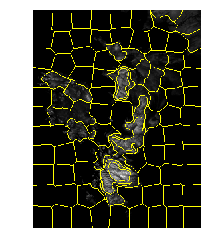

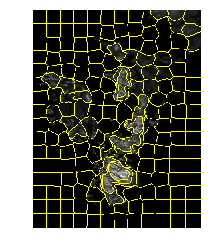

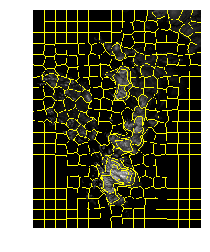

In [72]:
# loop over the number of segments
for numSegments in (100, 200, 300):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = numSegments, sigma = 5)
    
    #print(segments.shape)
    #print(segments)

    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("off")

# show the plots
plt.show()


In [96]:
print(np.max(segments), np.min(segments))
print(segments.shape)

print(np.mean(data_set.variables['air_temperature'][0][0].data[segments==i]))

myavg_airtemp = []
myavg_gust = []
myavg_surfacepressure = []
for i in range(np.max(segments)):
    myavg_airtemp.append(np.mean(data_set.variables['air_temperature'][0][0].data[segments==i])) 
    myavg_gust.append(np.mean(data_set.variables['wind_speed_of_gust'][0].data[segments==i])) 
    myavg_surfacepressure.append(np.mean(data_set.variables['surface_air_pressure'][0].data[segments==i])) 
    
print(myavg_airtemp, len(myavg_airtemp))
print(myavg_gust, len(myavg_gust))
print(myavg_surfacepressure, len(myavg_surfacepressure))

data_set.variables['surface_air_pressure'][0].data.shape

296 0
(548, 421)
238.64224
[253.44882, 251.95822, 250.86719, 249.74234, 248.42427, 246.80533, 246.35284, 246.7774, 246.91023, 246.27788, 246.03564, 247.13026, 248.79951, 249.9542, 251.05606, 247.05582, 248.5298, 246.60449, 246.09778, 253.62085, 252.20184, 250.66248, 249.3731, 248.14142, 246.50655, 246.07034, 246.49808, 250.5783, 246.71358, 249.39862, 246.23567, 247.46822, 246.61009, 245.75046, 246.19063, 246.27888, 249.80658, 253.73166, 252.3656, 250.25398, 248.51335, 247.51482, 246.00047, 248.74055, 246.31041, 249.00993, 246.2587, 246.16417, 245.14711, 245.39279, 246.81946, 246.34512, 253.74178, 249.62775, 247.27527, 245.58731, 246.16234, 252.16264, 248.05254, 245.83997, 244.5763, 245.60521, 248.67064, 244.96852, 249.20184, 245.19803, 246.37419, 253.59212, 245.81085, 246.03575, 247.35994, 246.19492, 244.6415, 245.2905, 251.91281, 245.11887, 248.7459, 244.86642, 245.97852, 253.6055, 243.96495, 244.10274, 246.06369, 247.52296, 244.18953, 244.54767, 245.4997, 245.9954, 243.98431, 251.963

(548, 421)

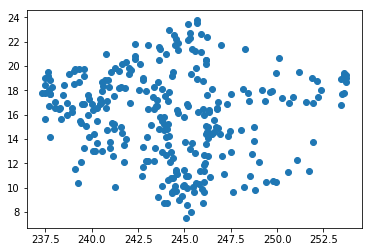

In [99]:
plt.scatter(myavg_airtemp, myavg_gust)

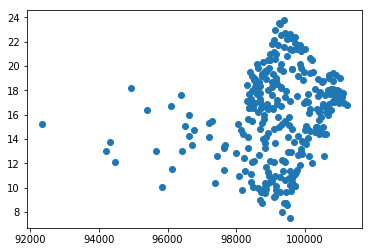

In [100]:
plt.scatter(myavg_surfacepressure, myavg_gust)


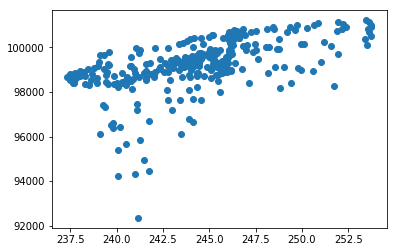

In [101]:
plt.scatter(myavg_airtemp, myavg_surfacepressure)

In [103]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [162]:
names = []
data = []

names.append('surface_air_pressure_0')
data.append(data_set.variables['surface_air_pressure'][0].data)
names.append('surface_air_pressure_1')
data.append(data_set.variables['surface_air_pressure'][1].data)
names.append('surface_air_pressure_2')
data.append(data_set.variables['surface_air_pressure'][2].data)
names.append('surface_air_pressure_3')
data.append(data_set.variables['surface_air_pressure'][3].data)

names.append('wind_speed_of_gust_0')
data.append(data_set.variables['wind_speed_of_gust'][0].data)
names.append('wind_speed_of_gust_1')
data.append(data_set.variables['wind_speed_of_gust'][1].data) # this one
names.append('wind_speed_of_gust_2')
data.append(data_set.variables['wind_speed_of_gust'][2].data)

names.append('air_temperature_0_0')
data.append(data_set.variables['air_temperature'][0][0].data)
names.append('air_temperature_1_0')
data.append(data_set.variables['air_temperature'][1][0].data)
names.append('air_temperature_2_0')
data.append(data_set.variables['air_temperature'][2][0].data)
# names.append('air_temperature_3_0')
# data.append(data_set.variables['wind_speed_of_gust'][3][0].data)
names.append('air_temperature_0_1')
data.append(data_set.variables['air_temperature'][0][1].data)
names.append('air_temperature_1_1')
data.append(data_set.variables['air_temperature'][1][1].data)
names.append('air_temperature_2_1')
data.append(data_set.variables['air_temperature'][2][1].data)

names.append('relative_humidity_0_0')
data.append(data_set.variables['relative_humidity'][0][0].data)
names.append('relative_humidity_1_0')
data.append(data_set.variables['relative_humidity'][1][0].data)
names.append('relative_humidity_2_0')
data.append(data_set.variables['relative_humidity'][2][0].data)
# names.append('air_temperature_3_0')
# data.append(data_set.variables['wind_speed_of_gust'][3][0].data)
names.append('relative_humidity_0_1')
data.append(data_set.variables['relative_humidity'][0][1].data)
names.append('relative_humidity_1_1')
data.append(data_set.variables['relative_humidity'][1][1].data)
names.append('relative_humidity_2_1')
data.append(data_set.variables['relative_humidity'][2][1].data)

# names.append('surface_altitude')
# data.append(data_set.variables['surface_altitude']) # had some problem with index being multi dimensional ?

# names.append('x_wind_0_0')
# data.append(data_set.variables['x_wind'][0][0].data) #boolean index did not match indexed array along dimension 0; dimension is 547 but corresponding boolean dimension is 548
# names.append('x_wind_1_0')
# data.append(data_set.variables['x_wind'][1][0].data)
# names.append('x_wind_2_0')
# data.append(data_set.variables['x_wind'][2][0].data)
# names.append('x_wind_3_0')
# data.append(data_set.variables['x_wind'][3][0].data)

# names.append('x_wind_0_1')
# data.append(data_set.variables['x_wind'][0][1].data)
# names.append('x_wind_1_1')
# data.append(data_set.variables['x_wind'][1][1].data)
# names.append('x_wind_2_1')
# data.append(data_set.variables['x_wind'][2][1].data)
# names.append('x_wind_3_1')
# data.append(data_set.variables['x_wind'][3][1].data)

# names.append('y_wind_0_0')
# data.append(data_set.variables['y_wind'][0][0].data)
# names.append('y_wind_1_0')
# data.append(data_set.variables['y_wind'][1][0].data)
# names.append('y_wind_2_0')
# data.append(data_set.variables['y_wind'][2][0].data)
# names.append('y_wind_3_0')
# data.append(data_set.variables['y_wind'][3][0].data)

# names.append('y_wind_0_1')
# data.append(data_set.variables['y_wind'][0][1].data)
# names.append('y_wind_1_1')
# data.append(data_set.variables['y_wind'][1][1].data)
# names.append('y_wind_2_1')
# data.append(data_set.variables['y_wind'][2][1].data)
# names.append('y_wind_3_1')
# data.append(data_set.variables['y_wind'][3][1].data)


#print(data_set.variables['wind_speed_of_gust'][2].data, data_set.variables['wind_speed_of_gust'][2].data.shape)

print(len(data))
data = np.array(data)
print(data.shape)

data_set.variables['x_wind']

19
(19, 548, 421)


<class 'netCDF4._netCDF4.Variable'>
float32 x_wind(time, pressure_0, grid_latitude_0, grid_longitude_0)
    _FillValue: -1073741800.0
    standard_name: x_wind
    units: m s-1
    um_stash_source: m01s15i201
    grid_mapping: rotated_latitude_longitude
    coordinates: forecast_period forecast_reference_time
unlimited dimensions: time
current shape = (4, 2, 547, 421)
filling on

In [179]:
#print(data)
# print(data[19].shape)
# print(names[19])
data_avg = np.zeros([len(names), np.max(segments)])
for i in range(np.max(segments)):
    for j in range(len(names)):
        #print(j)
#         print(np.mean(data[j][segments==i]))
#         print(i,j)
#         print(data_avg[i, j])
        data_avg[j, i]=np.mean(data[j][segments==i])
print(data_avg.shape)  

lists = np.random.rand(2,data_avg.shape[0],data_avg.shape[1])
lists[0]=data_avg
lists[1]=data_avg
print(lists.shape)  


(19, 296)
(2, 19, 296)


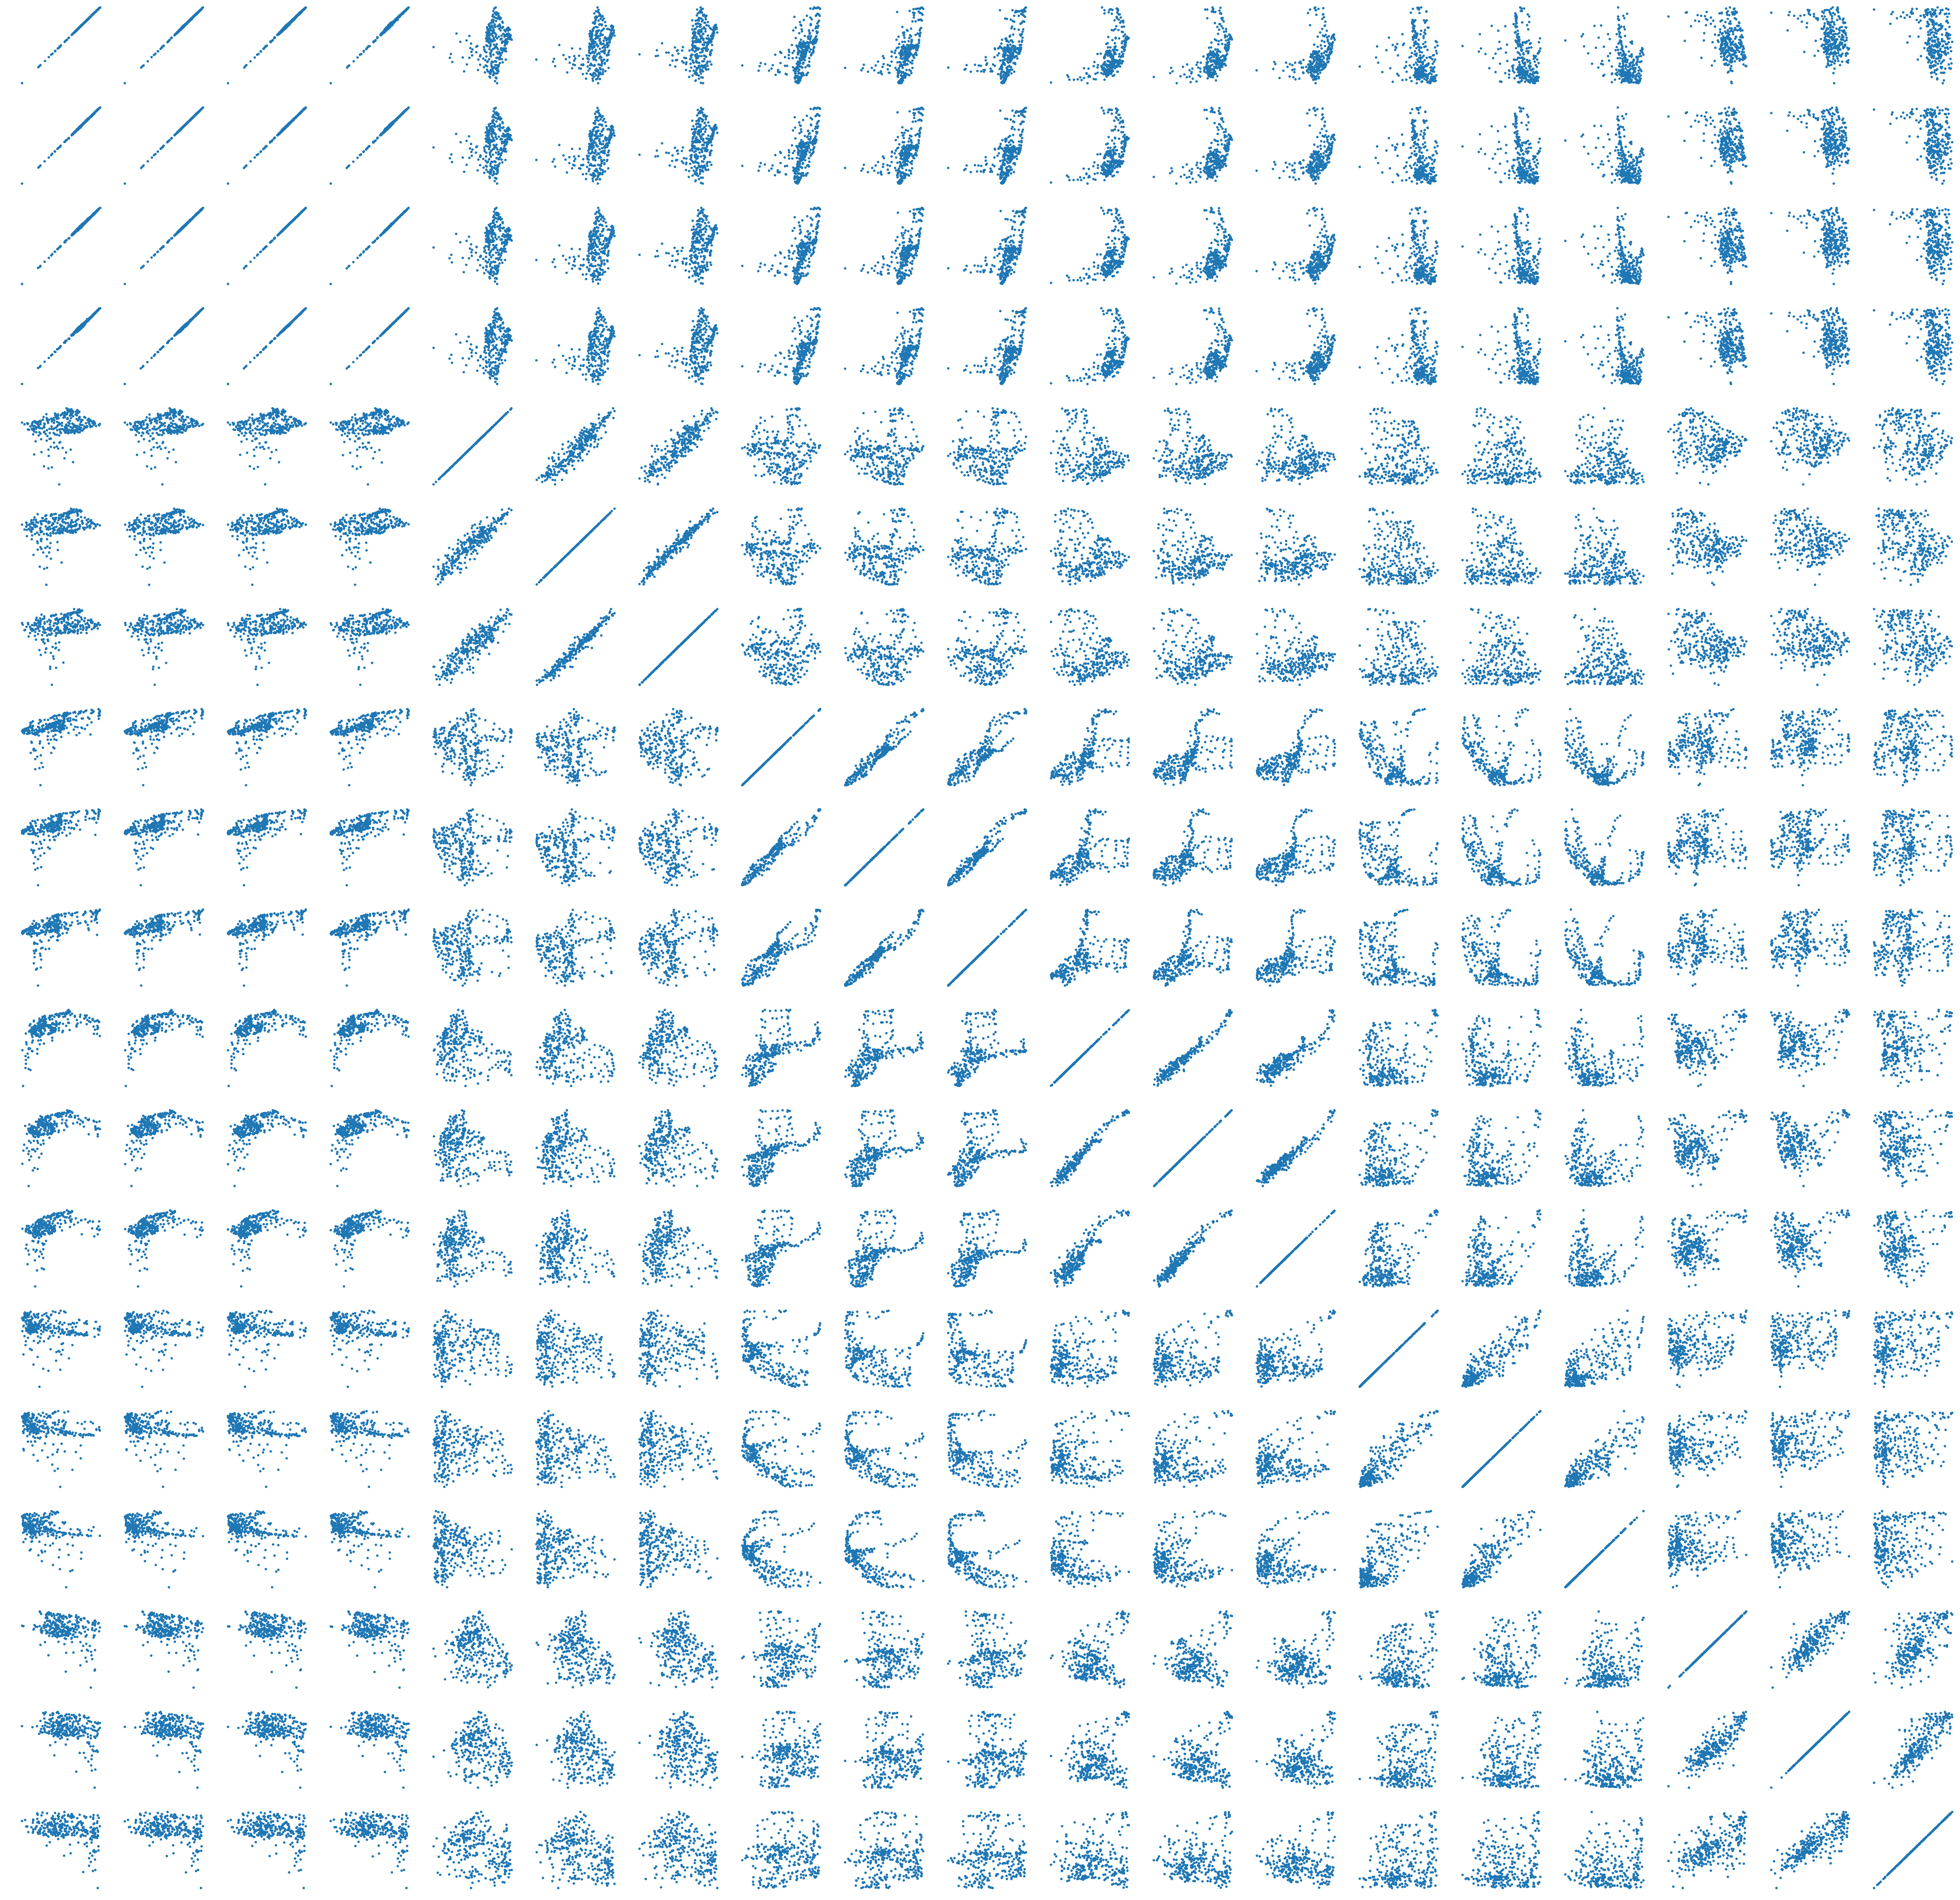

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

#==================================================

# Load list
#lists = np.load('lists.npy')
#lists = np.random.rand(2,3,10)

# lists = [mean or variance, flow property, segment number]

Nv, Np, Ns = np.shape(lists) # Nv = 2 (mean or variance), Np = no of flow properties, Ns = no of segments




# Define width ratio of each subplot
grsp = gs.GridSpec(Np,Np)

plt.figure(figsize=(100,100))
for row in range(0,Np):
    for column in range(0,Np):
        plt.subplot(grsp[row,column])
        plt.scatter(lists[0,row,:],lists[1,column,:])
        plt.axis('off')
                
#plt.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(400,400))


#plt.show()
